# ENPH 213 - Week 8 Lab

In this lab, we will be working on Inverse Discrete Fourier Transforms, Fourier Analysis, and continuing to develop your Python skills.

When you are finished, please rename this notebook to LastName_ENPH213_Lab8, where LastName is your last name.  Submit that file to onQ.

For marking Parts 1-3 will be marked together (Weighted out of 10) and Part 4 will be marked out of 5.

# Part 1

Create a function $cDFT(y)$ that calculates the $y_k$ coefficients using the complex form for discrete Fourier transforms $e^{-jk 2\pi i / N}$.  

When generating the data set, first create your x-points in the range from 0 to 6, and use at least 10,000 points.  Then, use the function 

$y(t) = e^{-25*(t-3)^2}$

to evaluate on that range of x-values.  Use this function in your new $cDFT(y)$ to compute the $y_k$ values.  Plot the $|y_k|$ values and print the first 10 values of the $y_k$ array.


[ 0.05907589+0.00000000e+00j -0.05843171-1.83568642e-05j
  0.05654103+3.55257792e-05j -0.05352485-5.04460003e-05j
  0.04957058+6.22922601e-05j -0.04491271-7.05487726e-05j
  0.03980991+7.50399983e-05j -0.03452151-7.59168989e-05j
  0.02928635+7.36047780e-05j -0.02430622-6.87243874e-05j]


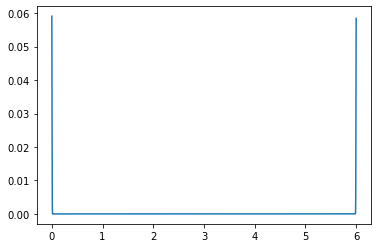

In [17]:
#Dataset in terms of frequency
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(0,6,10000)

#Function that we want to use
def yFunc(t):
    return np.exp(-25*(t-3)**2)

#Function that computes the yk values
def cDFT(y):
    n=y.size
    kmax = n//2
    #Create the yk array
    yk = np.array(np.zeros(2*(kmax)),dtype = 'complex')
    
    #Get the i values (list from 0->n)
    i = np.arange(n)
    
    for k in range(n):
        yk[k]=(1/n)*np.sum(y*np.exp((-1j*k*2*np.pi*i)/n))
    
    return yk

y = yFunc(x)

#Print 10 vals and also plot
yk = cDFT(y)
print(yk[0:10])

plt.plot(x,abs(yk))
plt.show()

# Part 2

Create a function $iDFT(yk)$ that calculates the $\tilde y_i$ coefficients using the complex form for inverse discrete Fourier transforms.  

As in Part 1, when generating the data set, first create your x-points in the range from 0 to 6, and use at least 200 points.  Then, use the function 

$y(t) = e^{-25*(t-3)^2} + 0.03 \cos(46 \pi t)$

to evaluate on that range of x-values.  Use this function in your $cDFT(y)$ from Part 1 to compute the $y_k$ values.  Plot the $|y_k|$ values to understand the contriubtion of the cosine noise term.  

Create a small bit of code to remove the noise from your $y_k$ values that is general enought that if the frequency of the cosine noise is changed slightly, it would still remove the noise.  

Then, apply your new $iDFT(yk)$ Inverse Transform to the filtered data.  Then, plot the real part of the data.

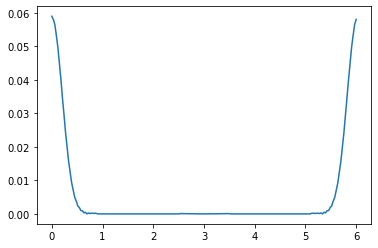

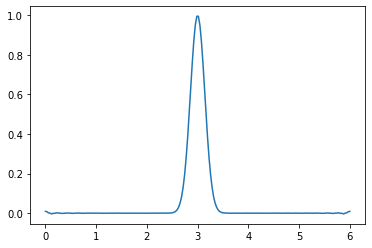

In [65]:
def yFunc2(t):
    return np.exp(-25*(t-3)**2) + 0.03*np.cos(46*np.pi*t)

x2 = np.linspace(0,6,200)
y2 = yFunc2(x2)

yk2 = cDFT(y2)

#Remove the noise (two major blips that need to be taken out)
#Arbitrary indexes to avoid setting out the two slopes at the ends of the function
xRangeFilter = 30
xRangeFilterPrime = 170

#If the value is diverting from 0, set to 0
for i in range(xRangeFilter, xRangeFilterPrime):
    if abs(yk2[i]) > 0.0001:
        yk2[i]=0

#Plot to show that the noise is gone!
plt.plot(x2,abs(yk2))
plt.show()

#This function performs complex fourier transforms and calculates y~
def iDFT(yk):
    n = yk.size
    i = np.arange(n)
    yspicy = np.zeros(n,dtype = 'complex')
    for k in range(n):
        yspicy[k] = np.sum(yk*np.exp((1j*k*2*np.pi*i)/n))
    
    return yspicy

yspicereal = np.real(iDFT(yk2))

#Plot the real part of the data
plt.plot(x2,yspicereal)
plt.show()


# Part 3

Download the Lab8-PeriodicData.txt file and load it into the notebook. Apply a windowing function and plot the function with the x-axis as the index points.  Use the built-in Numpy FFT function to transform the dataset.  Then, in the change 3 points in the $y_k$ data to create noticeable noise in the signal (plotting the $y_k$ values should help).  Finally, apply the Numpy iFFT function to recover the altered dataset.  Plot the real and imaginary parts of the altered data.

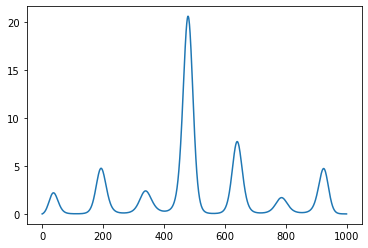

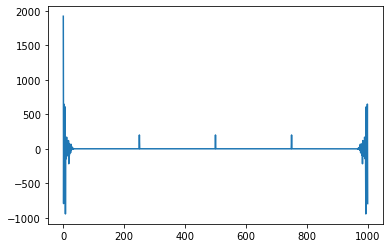

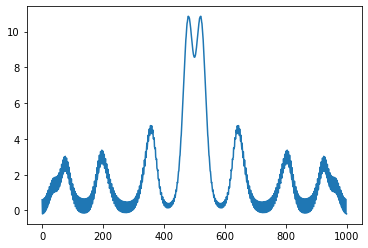

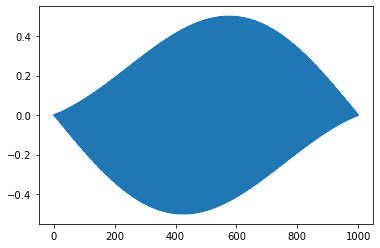

In [19]:
from numpy import fft as nft

yData = np.loadtxt("Lab8-PeriodicData.txt")
xData = np.arange(0,len(yData),1)
    
#Sine Window function
def sineWindow(x):
    number = len(x)
    y = np.sin(x)
    
    #Scale the sin to default here (period of 1 effectively)
    for i in range(number):
        y[i] = np.sin((i*np.pi)/(number-1))
        
    return y

#Get the windowed y values and plot them as a function of xData!
yDataWindow = sineWindow(xData)*yData

plt.plot(xData,yDataWindow)
plt.show()

#Perform the numpy FFT function
yk = np.real(nft.fft(yDataWindow))

#add some NOISE!
yk[250]=200
yk[500]=200
yk[750]=200

plt.plot(xData,yk)
plt.show()

#Use the iFFT function!
ykR = np.real(nft.ifft(yk))

#Plot the real and imaginary
plt.plot(xData,ykR)
plt.show()

ykI = np.imag(nft.ifft(yk))

plt.plot(xData,ykI)
plt.show()

# Part 4

Download the Lab8-PeriodicData2.txt file fro onQ and load them into Jupyter.  This dataset is comprise of different regions and different frequencies.  For this part, you will create a moving window to analyse the frequencies in that window.  Consider the x-axis (first column) to be time in seconds.

Choose a windowing function (not the rectangular window) that is 101 points across and will be defined by its centre point.  From the windowed region, apply the Numpy FFT to determine the frequency and magnitude of the oscillatory componenets within the region (ie. position and hieght of the maxima in the FFT).  Note: you will have to determine the actual frequency from the period of the window and the k-value in the transformed data.

Scan the window across all possible times so that you can identify the strength and frequency of each component as a function of time.  Then, make a plot for each frequency that indicates its strength (in your window) as a function of time.

5 Dominant Freq's: [4, 10, 16, 7, 24]


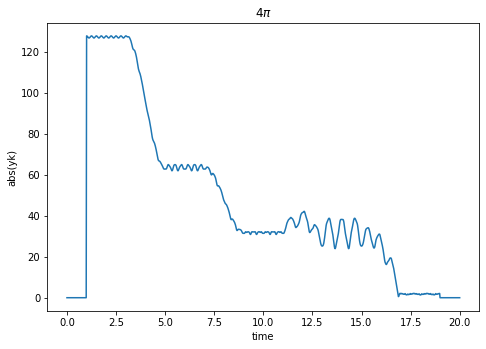

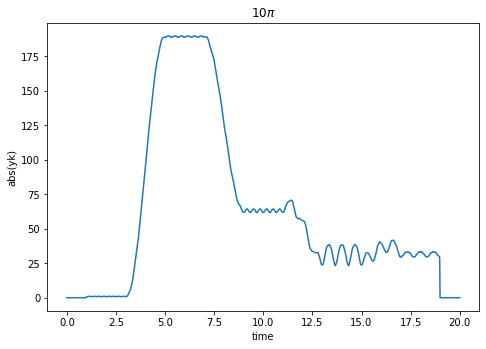

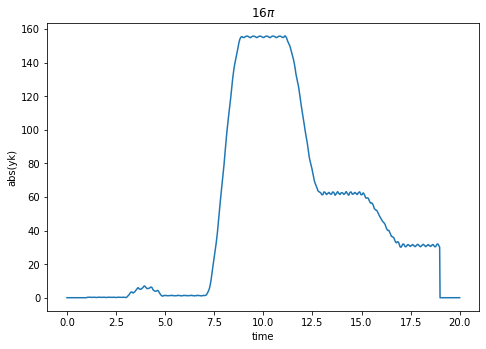

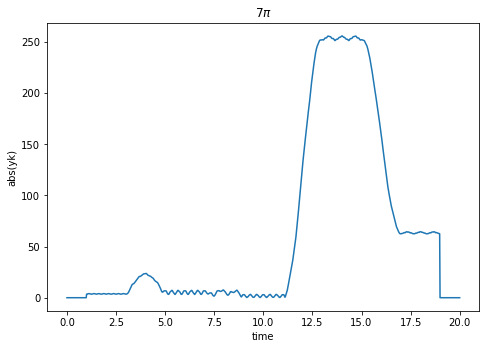

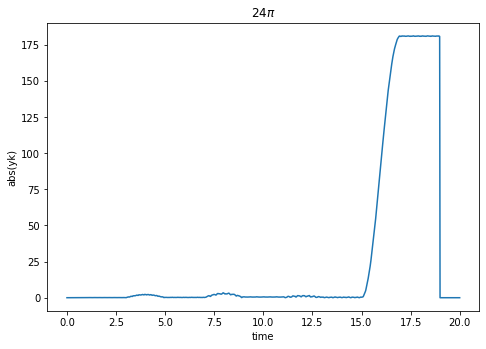

In [61]:
#Get our times and frequencies
dataVals = np.loadtxt("Lab8-PeriodicData2.txt")
time = dataVals[:,0]
freq = dataVals[:,1]

#This new sine window is redesigned to accomodate the moving window.
def SineWindowQ4(x,middle):
    vals = np.linspace(0,np.pi,101)
    return np.sin(vals)*x[middle-50:middle+51]

#This function allows for the location of the max frequencies, and returns their respective indices
def maxLocate(x):
    max_i = []
    for i in range(1,(np.size(x-1)//2)):
        if x[i-1]<x[i] and x[i+1] < x[i] and (x[i]-x[i+1]) > 1 and (x[i]-x[i+1]) > 1:
            max_i.append(i)
    return max_i

#Now, we want to use our moving window function (from 50->950)
maxArray = []
freqArray = []

#I want to store all the absolute yk values in an array
fArray = np.zeros((1001,100))

#In this loop, I want to find the yk values, using the moving window (then I catalogue them)
for i in range(50,950):
    midPoint = i
    
    #Window and yk
    windowVals = SineWindowQ4(freq,midPoint)
    yk = nft.fft(windowVals)
    
    #Get the max vals
    maxVals = maxLocate(yk)
    maxArray.append(maxVals)
    
    #Let's catalogue our yk magnitudes
    for k in range(50):
        fArray[i,k] = abs(yk[k])
        
#Now it's time to find the dominant frequencies!
for middleVal in range(100,1000,200):
    fWanted = np.zeros(101)
    for i in range(50):
        fWanted[i] = sum(fArray[middleVal-50:middleVal+51:, i])
    freqArray.append(np.argmax(fWanted))

#Now, lets present our findings!
print("5 Dominant Freq's:", freqArray)

#Now, we want to print out the 5 graphs that demonstate the maximum frequencies!
for vals in freqArray:
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.plot(time,fArray[:,vals])
    plt.ylabel("abs(yk)")
    plt.xlabel("time")
    plt.title(r"%s$\pi$" % vals)

## Acknowledgements

Please comment on any help that you received from your group members or others concerning this Lab assignment.